In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
dataframe =  pd.DataFrame({"Stock":[300, 345, 330, 320, 600, 650, 670, 680, 690, None, 650, 650, 640, 660]})

In [3]:
dataframe

,Stock
0,300.0
1,345.0
2,330.0
3,320.0
4,600.0
5,650.0
6,670.0
7,680.0
8,690.0
9,NaN


<AxesSubplot:>

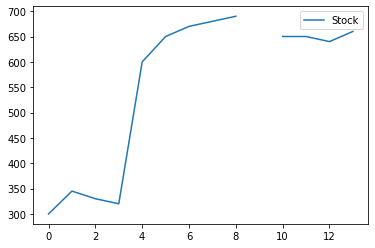

In [4]:
dataframe.plot()

# DROP MISSING VALUE

In [5]:
missingdata = dataframe.copy()
missingdata.dropna(inplace=True)

In [6]:
missingdata

,Stock
0,300.0
1,345.0
2,330.0
3,320.0
4,600.0
5,650.0
6,670.0
7,680.0
8,690.0
10,650.0


<AxesSubplot:>

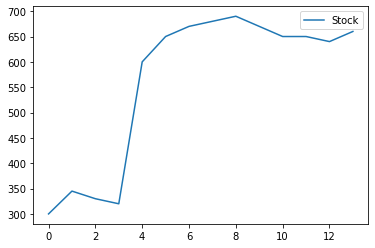

In [7]:
missingdata.plot()

# IMPUTE with MEAN

In [8]:
meandf = dataframe.copy()

In [9]:
meandf.fillna(meandf.mean(), inplace=True)

In [10]:
meandf

,Stock
0,300.000000
1,345.000000
2,330.000000
3,320.000000
4,600.000000
5,650.000000
6,670.000000
7,680.000000
8,690.000000
9,552.692308


<AxesSubplot:>

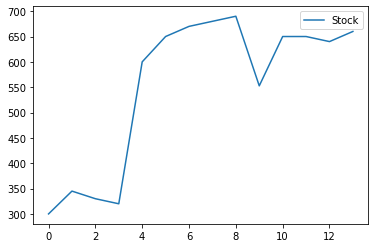

In [11]:
meandf.plot()

In [12]:
from numpy import nan, isnan
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(missing_values=nan, strategy='mean')

In [14]:
imputedata = dataframe.copy()

In [15]:
imputedata

,Stock
0,300.0
1,345.0
2,330.0
3,320.0
4,600.0
5,650.0
6,670.0
7,680.0
8,690.0
9,NaN


In [16]:
values = imputedata.values
transformed_values = imputer.fit_transform(values)

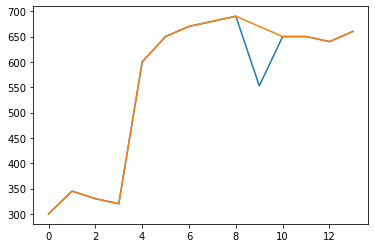

In [17]:
plt.plot(transformed_values)
plt.plot(missingdata['Stock'])
plt.show()

# Forward Fill and Backward Fill

In [18]:
dataframe

,Stock
0,300.0
1,345.0
2,330.0
3,320.0
4,600.0
5,650.0
6,670.0
7,680.0
8,690.0
9,NaN


In [18]:
fdata = dataframe['Stock'].ffill(axis = 0)
fdata

0     300.0
1     345.0
2     330.0
3     320.0
4     600.0
5     650.0
6     670.0
7     680.0
8     690.0
9     690.0
10    650.0
11    650.0
12    640.0
13    660.0
Name: Stock, dtype: float64

In [19]:
bdata = dataframe['Stock'].bfill(axis = 0)
bdata

0     300.0
1     345.0
2     330.0
3     320.0
4     600.0
5     650.0
6     670.0
7     680.0
8     690.0
9     650.0
10    650.0
11    650.0
12    640.0
13    660.0
Name: Stock, dtype: float64

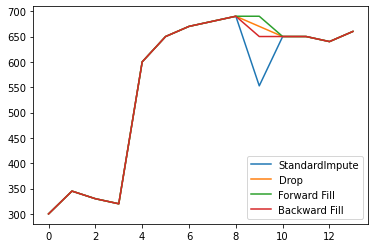

In [20]:
plt.plot(transformed_values, label ="StandardImpute")
plt.plot(missingdata['Stock'], label = "Drop")
plt.plot(fdata , label = "Forward Fill")
plt.plot(bdata, label = "Backward Fill")
plt.legend()
plt.show()

# KNN Imputer with Categorical Data

In [21]:
categoryData =  pd.DataFrame({"Gender":["Male", "Female", None, "Female","Male", "Female","Male", None,"Male", "Female",],
                             "Age": [45,18,40,20,42,21,43,19,44,20]})

In [22]:
categoryData['Gender_Map'] = categoryData["Gender"].map({"Male":0, "Female":1})

In [25]:
categoryData

,Gender,Age,Gender_Map
0,Male,45,0.0
1,Female,18,1.0
2,None,40,NaN
3,Female,20,1.0
4,Male,42,0.0
5,Female,21,1.0
6,Male,43,0.0
7,None,19,NaN
8,Male,44,0.0
9,Female,20,1.0


In [26]:
from sklearn.impute import KNNImputer

In [27]:
imputer = KNNImputer(n_neighbors=3)

In [28]:
newDF = imputer.fit_transform(categoryData[['Age','Gender_Map']])

In [29]:
newDF

array([[45.,  0.],
       [18.,  1.],
       [40.,  0.],
       [20.,  1.],
       [42.,  0.],
       [21.,  1.],
       [43.,  0.],
       [19.,  1.],
       [44.,  0.],
       [20.,  1.]])

# Function Based

In [30]:
MixedData =  pd.DataFrame({"Gender":["Male", "Female", None, "Female","Male", "Female","Male", None,"Male", "Female",],
                             "Age": [45,18,40,20,42,21,43,19,44,20],
                             "Salary": [450,118,420,None,None,221,413,149,414,220]})
MixedData

,Gender,Age,Salary
0,Male,45,450.0
1,Female,18,118.0
2,None,40,420.0
3,Female,20,NaN
4,Male,42,NaN
5,Female,21,221.0
6,Male,43,413.0
7,None,19,149.0
8,Male,44,414.0
9,Female,20,220.0


In [35]:
def imputeSalary(x):
    sal = x['Salary']
    age = x['Age']
    if pd.isnull(sal):
        if age<30:
            return 200
        else:
            return 400
    else:
        return sal
    

In [36]:
MixedData['New_Salary'] = MixedData.apply(imputeSalary, axis=1)

In [37]:
MixedData

,Gender,Age,Salary,New_Salary
0,Male,45,450.0,450.0
1,Female,18,118.0,118.0
2,None,40,420.0,420.0
3,Female,20,NaN,200.0
4,Male,42,NaN,400.0
5,Female,21,221.0,221.0
6,Male,43,413.0,413.0
7,None,19,149.0,149.0
8,Male,44,414.0,414.0
9,Female,20,220.0,220.0


In [29]:
#!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org impyute

In [41]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
train, target = pd.DataFrame(dataset.data), pd.DataFrame(dataset.target)
train.columns = ['0','1','2','3','4','5','6','7']
train.insert(loc=len(train.columns), column='target', value=target)

In [46]:
import random
import numpy as np
#Randomly replace 40% of the first column with NaN values
column = train['0']
print(column.size)
missing_pct = int(column.size * 0.4)
i = [random.choice(range(column.shape[0])) for _ in range(missing_pct)]
column[i] = np.NaN
print(column.shape[0])

20640
20640


In [47]:
from impyute.imputation.cs import mice

In [48]:
imputed_training=mice(train.values)

In [50]:
train

,0,1,2,3,4,5,6,7,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,NaN,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,NaN,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [51]:
imputed_training

array([[   8.3252    ,   41.        ,    6.98412698, ...,   37.88      ,
        -122.23      ,    4.526     ],
       [   8.3014    ,   21.        ,    6.23813708, ...,   37.86      ,
        -122.22      ,    3.585     ],
       [   7.2574    ,   52.        ,    8.28813559, ...,   37.85      ,
        -122.24      ,    3.521     ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,   39.43      ,
        -121.22      ,    0.923     ],
       [   1.8672    ,   18.        ,    5.32951289, ...,   39.43      ,
        -121.32      ,    0.847     ],
       [   2.41939221,   16.        ,    5.25471698, ...,   39.37      ,
        -121.24      ,    0.894     ]])

In [55]:
#import datawig

In [52]:
#!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org datawig

In [ ]:
#https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779